In [42]:
# Problema: Temos dados de cerca de 8.950 titulares de cartões de crédito nos últimos 6 meses. 
# Nosso trabalho é agrupar ou clusterizar esses clientes com base no uso do cartão de crédito.
# Carregando as principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
import random 
from sklearn.datasets.samples_generator import make_blobs 
import pylab as pl
%matplotlib inline

In [43]:
# Carregando o arquivo .csv utilizando pd.read para a variável df
df = pd.read_csv("CC GENERAL.csv")

In [44]:
# Fazendo a leitura das primeiras 5 linhas utilizando head()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [45]:
# Fazendo a leitura do total de linhas e colunas
df.shape

(8950, 18)

In [46]:
# Usando o método describe() para calcular e exibir as estatísticas resumidas para um dataframe. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [47]:
# Contando os valores de NaN numa coluna com o .isna().sum() 
# Nesse caso foi observado 313 valores NaN no campo MINIMUM_PAYMENTS
# e 1 caso de NaN no campo CREDIT_LIMIT 
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [48]:
# Substituido os 'NaN' pelo valor da média da coluna
mean_value=df['CREDIT_LIMIT'].mean()
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(mean_value)

In [49]:
# Substituido os 'NaN' pelo valor da média da coluna
mean_value=df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(mean_value)

In [50]:
# Fazendo novo somatório dos 'NaN' verificamos que não existem mais 'NaN'
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [51]:
# Utilizei o método corr() para encontrar a matriz de correlação utilizando o método Pearson.
a = df.corr()
a

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


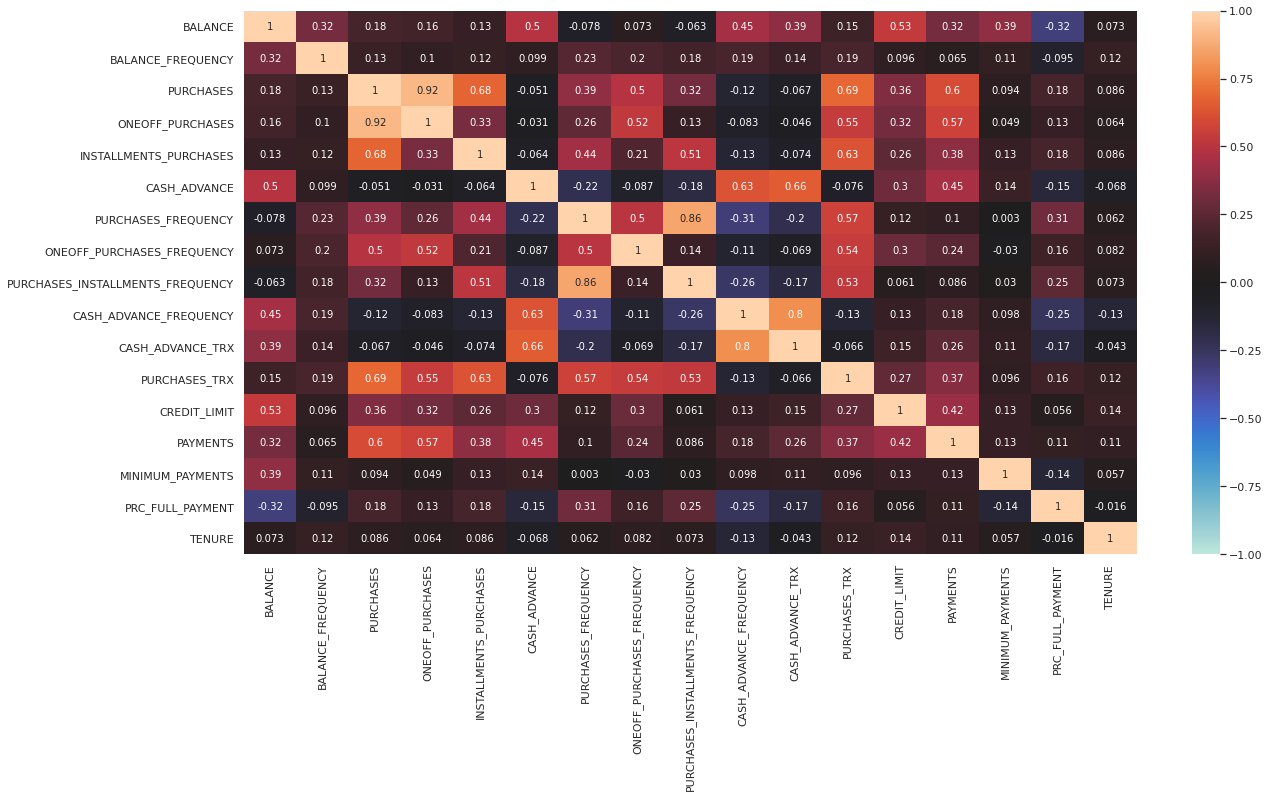

In [52]:
# Utilizei o heatmap para exibir os valores de correlação no mapa de calor.
plt.figure(figsize=(20,10))
sns.heatmap(a,vmin=-1,vmax=1,center=0,annot=True)

In [53]:
# Deletado o campo 'CUST_ID'
df = df.drop('CUST_ID', axis=1)
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [55]:
# StandardScaler -> implementa a TransformerAPI para calcular a média e o 
# desvio padrão em um conjunto de treinamento, de modo a poder reaplicar 
# posteriormente a mesma transformação no conjunto de teste.
from sklearn.preprocessing import StandardScaler
# Deleta a primeira linha do Dataset 
X = df.values[:,1:]
X = np.nan_to_num(X)

# fit_transform() é usado nos dados de treinamento para que possamos dimensionar os dados de treinamento 
# e também aprender os parâmetros de dimensionamento desses dados. 
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.24943448, -0.42489974, -0.35693402, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.13432467, -0.46955188, -0.35693402, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.51808382, -0.10766823,  0.10888851, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.18547673, -0.40196519, -0.35693402, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.18547673, -0.46955188, -0.35693402, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.88903307,  0.04214581,  0.30173158, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=6, random_state=0)

In [59]:
kmeans.labels_

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

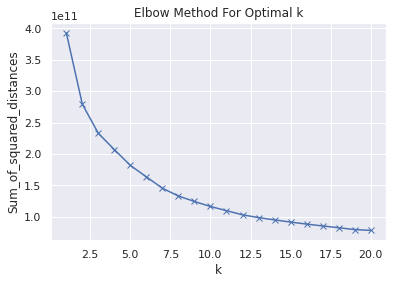

In [67]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,17):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(df)
    centers = km.cluster_centers_

    score = silhouette_score(df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5113206150139656
For n_clusters = 3, silhouette score is 0.46564633901733055
For n_clusters = 4, silhouette score is 0.398138272259527
For n_clusters = 5, silhouette score is 0.37787762949510667
For n_clusters = 6, silhouette score is 0.3764027977296494
For n_clusters = 7, silhouette score is 0.36977346909156983
For n_clusters = 8, silhouette score is 0.38095328051683275
For n_clusters = 9, silhouette score is 0.35741233862328425
For n_clusters = 10, silhouette score is 0.3586182044384957
For n_clusters = 11, silhouette score is 0.3583892082615562
For n_clusters = 12, silhouette score is 0.36232024316090133
For n_clusters = 13, silhouette score is 0.30541162944453265
For n_clusters = 14, silhouette score is 0.25423103991125234
For n_clusters = 15, silhouette score is 0.25422530687616923
For n_clusters = 16, silhouette score is 0.29324895312703175


In [90]:
km_sample = KMeans(n_clusters=4)
km_sample.fit(df)

KMeans(n_clusters=4)

In [91]:
labels_sample = km_sample.labels_

In [92]:
df['N_CLUSTER'] = labels_sample

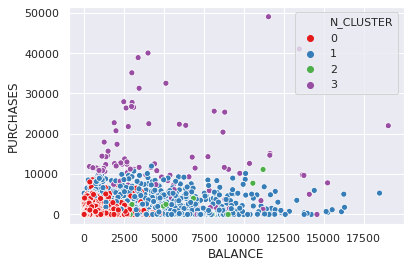

In [93]:
sns.set_palette('Set2')
sns.scatterplot(df['BALANCE'],df['PURCHASES'],hue=df['N_CLUSTER'],palette='Set1')